In [80]:
import pandas as pd
import numpy as np
pd.set_option('display.max_columns',100)

In [81]:
from xgboost.sklearn import XGBClassifier

In [82]:
data=pd.read_csv('../data/adult.csv')

In [83]:
data

,age,workclass,fnlwgt,education,education.num,marital.status,occupation,relationship,race,sex,capital.gain,capital.loss,hours.per.week,native.country,income
0,90,?,77053,HS-grad,9,Widowed,?,Not-in-family,White,Female,0,4356,40,United-States,<=50K
1,82,Private,132870,HS-grad,9,Widowed,Exec-managerial,Not-in-family,White,Female,0,4356,18,United-States,<=50K
2,66,?,186061,Some-college,10,Widowed,?,Unmarried,Black,Female,0,4356,40,United-States,<=50K
3,54,Private,140359,7th-8th,4,Divorced,Machine-op-inspct,Unmarried,White,Female,0,3900,40,United-States,<=50K
4,41,Private,264663,Some-college,10,Separated,Prof-specialty,Own-child,White,Female,0,3900,40,United-States,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32556,22,Private,310152,Some-college,10,Never-married,Protective-serv,Not-in-family,White,Male,0,0,40,United-States,<=50K
32557,27,Private,257302,Assoc-acdm,12,Married-civ-spouse,Tech-support,Wife,White,Female,0,0,38,United-States,<=50K
32558,40,Private,154374,HS-grad,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0,0,40,United-States,>50K
32559,58,Private,151910,HS-grad,9,Widowed,Adm-clerical,Unmarried,White,Female,0,0,40,United-States,<=50K


In [84]:
data['occupation'].value_counts(1)

Prof-specialty       0.127146
Craft-repair         0.125887
Exec-managerial      0.124873
Adm-clerical         0.115783
Sales                0.112097
Other-service        0.101195
Machine-op-inspct    0.061485
?                    0.056601
Transport-moving     0.049046
Handlers-cleaners    0.042075
Farming-fishing      0.030527
Tech-support         0.028500
Protective-serv      0.019932
Priv-house-serv      0.004576
Armed-Forces         0.000276
Name: occupation, dtype: float64

In [85]:
data['workclass'].value_counts(1)

Private             0.697030
Self-emp-not-inc    0.078038
Local-gov           0.064279
?                   0.056386
State-gov           0.039864
Self-emp-inc        0.034274
Federal-gov         0.029483
Without-pay         0.000430
Never-worked        0.000215
Name: workclass, dtype: float64

In [86]:
data.replace({'?':np.nan},inplace=True)

In [87]:
data.shape

(32561, 15)

In [88]:
data.isnull().sum()/data.shape[0]

age               0.000000
workclass         0.056386
fnlwgt            0.000000
education         0.000000
education.num     0.000000
marital.status    0.000000
occupation        0.056601
relationship      0.000000
race              0.000000
sex               0.000000
capital.gain      0.000000
capital.loss      0.000000
hours.per.week    0.000000
native.country    0.017905
income            0.000000
dtype: float64

In [89]:
data.dropna(inplace=True)

In [90]:
data.reset_index(drop=True,inplace=True)

In [91]:
data['income'].value_counts(1)

<=50K    0.751078
>50K     0.248922
Name: income, dtype: float64

In [92]:
data['native.country'].value_counts(1)

United-States                 0.911876
Mexico                        0.020224
Philippines                   0.006233
Germany                       0.004244
Puerto-Rico                   0.003614
Canada                        0.003548
India                         0.003315
El-Salvador                   0.003315
Cuba                          0.003050
England                       0.002851
Jamaica                       0.002652
South                         0.002354
Italy                         0.002254
China                         0.002254
Dominican-Republic            0.002221
Vietnam                       0.002122
Guatemala                     0.002089
Japan                         0.001956
Columbia                      0.001857
Poland                        0.001857
Iran                          0.001392
Taiwan                        0.001392
Haiti                         0.001392
Portugal                      0.001127
Nicaragua                     0.001094
Peru                     

In [93]:
data.describe()

,age,fnlwgt,education.num,capital.gain,capital.loss,hours.per.week
count,30162.000000,3.016200e+04,30162.000000,30162.000000,30162.000000,30162.000000
mean,38.437902,1.897938e+05,10.121312,1092.007858,88.372489,40.931238
std,13.134665,1.056530e+05,2.549995,7406.346497,404.298370,11.979984
min,17.000000,1.376900e+04,1.000000,0.000000,0.000000,1.000000
25%,28.000000,1.176272e+05,9.000000,0.000000,0.000000,40.000000
50%,37.000000,1.784250e+05,10.000000,0.000000,0.000000,40.000000
75%,47.000000,2.376285e+05,13.000000,0.000000,0.000000,45.000000
max,90.000000,1.484705e+06,16.000000,99999.000000,4356.000000,99.000000


In [94]:
data[data['capital.loss']!=0]

,age,workclass,fnlwgt,education,education.num,marital.status,occupation,relationship,race,sex,capital.gain,capital.loss,hours.per.week,native.country,income
0,82,Private,132870,HS-grad,9,Widowed,Exec-managerial,Not-in-family,White,Female,0,4356,18,United-States,<=50K
1,54,Private,140359,7th-8th,4,Divorced,Machine-op-inspct,Unmarried,White,Female,0,3900,40,United-States,<=50K
2,41,Private,264663,Some-college,10,Separated,Prof-specialty,Own-child,White,Female,0,3900,40,United-States,<=50K
3,34,Private,216864,HS-grad,9,Divorced,Other-service,Unmarried,White,Female,0,3770,45,United-States,<=50K
4,38,Private,150601,10th,6,Separated,Adm-clerical,Unmarried,White,Male,0,3770,40,United-States,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1422,37,Private,262409,Masters,14,Divorced,Exec-managerial,Unmarried,White,Female,0,213,45,United-States,<=50K
1423,38,Private,173047,Bachelors,13,Divorced,Adm-clerical,Unmarried,Asian-Pac-Islander,Female,0,213,40,Philippines,<=50K
1424,40,Private,65866,Some-college,10,Divorced,Tech-support,Unmarried,White,Female,0,213,40,United-States,<=50K
1425,36,Private,204590,Bachelors,13,Divorced,Prof-specialty,Unmarried,Black,Female,0,213,40,United-States,<=50K


<AxesSubplot:>

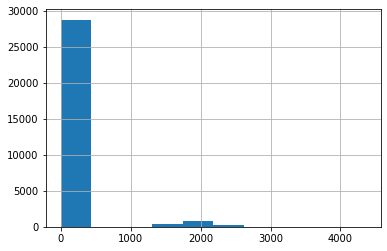

In [95]:
data['capital.loss'].hist()

<AxesSubplot:>

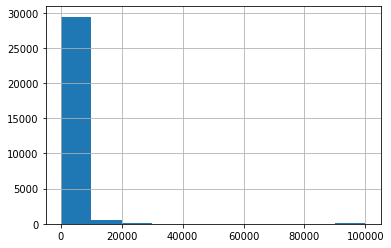

In [96]:
data['capital.gain'].hist()

In [97]:
data[data['hours.per.week']<40].describe()

,age,fnlwgt,education.num,capital.gain,capital.loss,hours.per.week
count,6714.000000,6.714000e+03,6714.000000,6714.000000,6714.000000,6714.000000
mean,36.065535,1.895084e+05,9.645517,583.418380,58.063301,26.034108
std,16.765739,1.057440e+05,2.506013,5388.720835,329.098300,9.058109
min,17.000000,1.376900e+04,1.000000,0.000000,0.000000,1.000000
25%,22.000000,1.188792e+05,9.000000,0.000000,0.000000,20.000000
50%,31.000000,1.785505e+05,10.000000,0.000000,0.000000,28.000000
75%,47.000000,2.360442e+05,10.000000,0.000000,0.000000,35.000000
max,90.000000,1.484705e+06,16.000000,99999.000000,4356.000000,39.000000


In [98]:
data[data['hours.per.week']<10].describe()

,age,fnlwgt,education.num,capital.gain,capital.loss,hours.per.week
count,289.000000,2.890000e+02,289.000000,289.000000,289.000000,289.000000
mean,42.273356,1.876077e+05,9.709343,405.079585,70.152249,6.051903
std,21.555114,1.247786e+05,2.637592,2774.206842,358.266773,2.170047
min,17.000000,2.678100e+04,2.000000,0.000000,0.000000,1.000000
25%,21.000000,1.130350e+05,9.000000,0.000000,0.000000,4.000000
50%,40.000000,1.709240e+05,10.000000,0.000000,0.000000,6.000000
75%,64.000000,2.366840e+05,12.000000,0.000000,0.000000,8.000000
max,85.000000,1.366120e+06,16.000000,34095.000000,2415.000000,9.000000


In [99]:
data=data[data['hours.per.week']>10].copy()

In [100]:
data.reset_index(drop=True,inplace=True)

In [101]:
data.head()

,age,workclass,fnlwgt,education,education.num,marital.status,occupation,relationship,race,sex,capital.gain,capital.loss,hours.per.week,native.country,income
0,82,Private,132870,HS-grad,9,Widowed,Exec-managerial,Not-in-family,White,Female,0,4356,18,United-States,<=50K
1,54,Private,140359,7th-8th,4,Divorced,Machine-op-inspct,Unmarried,White,Female,0,3900,40,United-States,<=50K
2,41,Private,264663,Some-college,10,Separated,Prof-specialty,Own-child,White,Female,0,3900,40,United-States,<=50K
3,34,Private,216864,HS-grad,9,Divorced,Other-service,Unmarried,White,Female,0,3770,45,United-States,<=50K
4,38,Private,150601,10th,6,Separated,Adm-clerical,Unmarried,White,Male,0,3770,40,United-States,<=50K


## Dummies

In [102]:
education_dummies = pd.get_dummies(data['education'])
marital_dummies = pd.get_dummies(data['marital.status'])
relationship_dummies = pd.get_dummies(data['relationship'])
sex_dummies = pd.get_dummies(data['sex'])
occupation_dummies = pd.get_dummies(data['occupation'])
native_dummies = pd.get_dummies(data['native.country'])
race_dummies = pd.get_dummies(data['race'])
workclass_dummies = pd.get_dummies(data['workclass'])

In [103]:
X = pd.concat([data[['age', 'hours.per.week']], occupation_dummies.iloc[:,:-1], workclass_dummies.iloc[:,:-1], education_dummies.iloc[:,:-1], marital_dummies.iloc[:,:-1], race_dummies.iloc[:,:-1], sex_dummies.iloc[:,:-1]], axis=1)
y = data['income'].copy()

In [104]:
X

,age,hours.per.week,Adm-clerical,Armed-Forces,Craft-repair,Exec-managerial,Farming-fishing,Handlers-cleaners,Machine-op-inspct,Other-service,Priv-house-serv,Prof-specialty,Protective-serv,Sales,Tech-support,Federal-gov,Local-gov,Private,Self-emp-inc,Self-emp-not-inc,State-gov,10th,11th,12th,1st-4th,5th-6th,7th-8th,9th,Assoc-acdm,Assoc-voc,Bachelors,Doctorate,HS-grad,Masters,Preschool,Prof-school,Divorced,Married-AF-spouse,Married-civ-spouse,Married-spouse-absent,Never-married,Separated,Amer-Indian-Eskimo,Asian-Pac-Islander,Black,Other,Female
0,82,18,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1
1,54,40,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1
2,41,40,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1
3,34,45,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,1
4,38,40,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29646,22,40,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0
29647,27,38,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1
29648,40,40,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0
29649,58,40,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1


In [105]:
from sklearn.model_selection import train_test_split

In [106]:
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.9, random_state=1)

In [107]:
from sklearn.ensemble import AdaBoostClassifier


In [108]:
AdaBoostClassifier?

In [109]:
clf = AdaBoostClassifier(random_state=1)
clf.fit(X_train, y_train)

AdaBoostClassifier(random_state=1)

In [110]:
y_pred = clf.predict(X_test)

In [111]:
from sklearn.metrics import roc_auc_score,accuracy_score,confusion_matrix

def metricas(model,Xv,yv): #Mide efectividad de un Modelo Predictivo
    print( " Roc Validate: %.3f" %roc_auc_score(y_score=model.predict_proba(Xv)[:,1],y_true=yv))
    print( " Acc Validate: %.3f" %accuracy_score(y_pred=model.predict(Xv),y_true=yv))
    print( " Matrix Conf Validate: ", "\n",confusion_matrix(y_pred=model.predict(Xv),y_true=yv))

In [112]:
metricas(clf,X_test,y_test)

 Roc Validate: 0.883
 Acc Validate: 0.828
 Matrix Conf Validate:  
 [[2018  184]
 [ 327  437]]


## XGBoost

In [113]:
from xgboost.sklearn import XGBClassifier

In [114]:
xgb=XGBClassifier()

In [115]:
XGBClassifier()

XGBClassifier(base_score=None, booster=None, colsample_bylevel=None,
              colsample_bynode=None, colsample_bytree=None, gamma=None,
              gpu_id=None, importance_type='gain', interaction_constraints=None,
              learning_rate=None, max_delta_step=None, max_depth=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              n_estimators=100, n_jobs=None, num_parallel_tree=None,
              random_state=None, reg_alpha=None, reg_lambda=None,
              scale_pos_weight=None, subsample=None, tree_method=None,
              validate_parameters=None, verbosity=None)

In [116]:
xgb.fit(X_train, y_train)

/home/jorge/Documents/Diplomado/ambientes/diplo_env/lib/python3.6/site-packages/xgboost/sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[20:14:39] WARNING: ../src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
              importance_type='gain', interaction_constraints='',
              learning_rate=0.300000012, max_delta_step=0, max_depth=6,
              min_child_weight=1, missing=nan, monotone_constraints='()',
              n_estimators=100, n_jobs=8, num_parallel_tree=1, random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
              tree_method='exact', validate_parameters=1, verbosity=None)

In [117]:
metricas(xgb,X_test,y_test)

 Roc Validate: 0.890
 Acc Validate: 0.836
 Matrix Conf Validate:  
 [[2003  199]
 [ 288  476]]


## Gradient Boosting

In [118]:
from sklearn.ensemble import GradientBoostingClassifier

In [119]:
GradientBoostingClassifier?

In [120]:
gb=GradientBoostingClassifier()


In [121]:
gb.fit(X_train, y_train)

GradientBoostingClassifier()

In [122]:
metricas(gb,X_test,y_test)

 Roc Validate: 0.887
 Acc Validate: 0.836
 Matrix Conf Validate:  
 [[2040  162]
 [ 323  441]]


## Otros modelos

In [123]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, ExtraTreesClassifier, VotingClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.svm import SVC

In [124]:
tree=DecisionTreeClassifier()
forest=RandomForestClassifier()
extra=ExtraTreesClassifier()
nn=MLPClassifier()
svm=SVC()

In [125]:
tree.fit(X_train,y_train)

DecisionTreeClassifier()

In [126]:
forest.fit(X_train,y_train)

RandomForestClassifier()

In [127]:
extra.fit(X_train,y_train)

ExtraTreesClassifier()

In [128]:
nn.fit(X_train,y_train)

MLPClassifier()

In [129]:
svm.fit(X_train,y_train)

SVC()

In [55]:
metricas(nn, X_test, y_test)

 Roc Validate: 0.886
 Acc Validate: 0.831
 Matrix Conf Validate:  
 [[1957  245]
 [ 256  508]]


In [56]:
metricas(tree, X_test, y_test)

 Roc Validate: 0.726
 Acc Validate: 0.781
 Matrix Conf Validate:  
 [[1910  292]
 [ 359  405]]


In [57]:
metricas(forest, X_test, y_test)

 Roc Validate: 0.861
 Acc Validate: 0.810
 Matrix Conf Validate:  
 [[1955  247]
 [ 317  447]]


In [58]:
metricas(extra, X_test, y_test)

 Roc Validate: 0.819
 Acc Validate: 0.805
 Matrix Conf Validate:  
 [[1952  250]
 [ 328  436]]


In [59]:
forest.feature_importances_

array([3.13566685e-01, 1.46349659e-01, 7.80588240e-03, 3.27133414e-05,
       9.11967048e-03, 2.82053052e-02, 6.66283381e-03, 4.65823871e-03,
       5.72664869e-03, 1.16386735e-02, 3.01512696e-04, 2.64331839e-02,
       4.39627814e-03, 9.44421747e-03, 6.79025665e-03, 6.42371421e-03,
       6.82097522e-03, 1.27857407e-02, 8.54202558e-03, 1.07140832e-02,
       5.75288934e-03, 4.25966819e-03, 5.40201203e-03, 2.43904542e-03,
       1.11840286e-03, 2.47198421e-03, 5.63468268e-03, 3.61137722e-03,
       7.61541947e-03, 8.21584536e-03, 3.16451523e-02, 8.58128007e-03,
       1.86626766e-02, 2.14426880e-02, 2.97471197e-04, 1.26054274e-02,
       1.75547350e-02, 7.81424290e-04, 1.12153273e-01, 1.92202017e-03,
       4.29572994e-02, 4.01384492e-03, 3.35193451e-03, 8.90519302e-03,
       1.19201969e-02, 2.10154956e-03, 2.81642092e-02])

In [60]:
importances=forest.feature_importances_
feature_importance= sorted(zip(importances, list(X.columns)), reverse=True)

df_importances = pd.DataFrame(feature_importance, columns=['importance', 'feature'])
importance= list(df_importances['importance'])
feature= list(df_importances['feature'])


In [61]:
df_importances

,importance,feature
0,0.313567,age
1,0.146350,hours.per.week
2,0.112153,Married-civ-spouse
3,0.042957,Never-married
4,0.031645,Bachelors
5,0.028205,Exec-managerial
6,0.028164,Female
7,0.026433,Prof-specialty
8,0.021443,Masters
9,0.018663,HS-grad


In [130]:
models=[('xgboost',xgb),('gradientboost',gb),('nn',nn)]

In [131]:
voting_model = VotingClassifier(estimators=models, voting='soft')


In [132]:
voting_model.fit(X_train,y_train)

/home/jorge/Documents/Diplomado/ambientes/diplo_env/lib/python3.6/site-packages/xgboost/sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[20:28:37] WARNING: ../src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


VotingClassifier(estimators=[('xgboost',
                              XGBClassifier(base_score=0.5, booster='gbtree',
                                            colsample_bylevel=1,
                                            colsample_bynode=1,
                                            colsample_bytree=1, gamma=0,
                                            gpu_id=-1, importance_type='gain',
                                            interaction_constraints='',
                                            learning_rate=0.300000012,
                                            max_delta_step=0, max_depth=6,
                                            min_child_weight=1, missing=nan,
                                            monotone_constraints='()',
                                            n_estimators=100, n_jobs=8,
                                            num_parallel_tree=1, random_state=0,
                                            reg_alpha=0, reg_lambda=1,
          

In [133]:
metricas(voting_model,X_test,y_test)

 Roc Validate: 0.892
 Acc Validate: 0.840
 Matrix Conf Validate:  
 [[2031  171]
 [ 304  460]]


## Randomized Search

In [65]:
from sklearn.model_selection import RandomizedSearchCV

In [66]:
param_grid={'n_estimators' :[50, 100, 250, 500, 750, 1000],
            'learning_rate' :[0.0001, 0.001, 0.01, 0.1, 1]}

In [67]:
grid = RandomizedSearchCV(estimator=AdaBoostClassifier(),param_distributions=param_grid,
                        cv=4,
                        scoring='roc_auc',
                        return_train_score=True,
                        n_jobs=-1,
                        verbose=1)

In [68]:
grid.fit(X_train, y_train)

Fitting 4 folds for each of 10 candidates, totalling 40 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  40 out of  40 | elapsed:  3.3min finished


RandomizedSearchCV(cv=4, estimator=AdaBoostClassifier(), n_jobs=-1,
                   param_distributions={'learning_rate': [0.0001, 0.001, 0.01,
                                                          0.1, 1],
                                        'n_estimators': [50, 100, 250, 500, 750,
                                                         1000]},
                   return_train_score=True, scoring='roc_auc', verbose=1)

In [64]:
best_ada=grid.best_estimator_

In [65]:
metricas(best_ada,X_test,y_test)

 Roc Validate: 0.884
 Acc Validate: 0.827
 Matrix Conf Validate:  
 [[2019  183]
 [ 330  434]]


In [72]:
param_grid_xgboost= {
        'gamma': [0.5, 1, 1.5, 2, 5],
        'subsample': [0.6, 0.8, 1.0],
        'colsample_bytree': [0.6, 0.8, 1.0],
        'max_depth': [3, 4, 5]
        }

In [73]:
grid_xgb = RandomizedSearchCV(estimator=XGBClassifier(),param_distributions=param_grid_xgboost,
                        cv=4,
                        scoring='roc_auc',
                        return_train_score=True,
                        n_jobs=-1,
                        verbose=1)

In [74]:
grid_xgb.fit(X_train, y_train)

Fitting 4 folds for each of 10 candidates, totalling 40 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  40 out of  40 | elapsed: 13.6min finished
/home/jorge/Documents/Diplomado/ambientes/diplo_env/lib/python3.6/site-packages/xgboost/sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[00:40:32] WARNING: ../src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


RandomizedSearchCV(cv=4,
                   estimator=XGBClassifier(base_score=None, booster=None,
                                           colsample_bylevel=None,
                                           colsample_bynode=None,
                                           colsample_bytree=None, gamma=None,
                                           gpu_id=None, importance_type='gain',
                                           interaction_constraints=None,
                                           learning_rate=None,
                                           max_delta_step=None, max_depth=None,
                                           min_child_weight=None, missing=nan,
                                           monotone_constraints=None,
                                           n_estimators=100,...
                                           num_parallel_tree=None,
                                           random_state=None, reg_alpha=None,
                                    

In [135]:
best_xgb=grid_xgb.best_estimator_

In [137]:
pd.to_pickle(best_xgb,'model_income_xgboost.pkl')

In [138]:
modelo_ganador=pd.read_pickle('model_income_xgboost.pkl')

In [139]:
modelo_ganador.predict(X_test)

array(['>50K', '<=50K', '<=50K', ..., '>50K', '<=50K', '<=50K'],
      dtype=object)

In [136]:
metricas(best_xgb,X_test,y_test)

 Roc Validate: 0.892
 Acc Validate: 0.839
 Matrix Conf Validate:  
 [[2017  185]
 [ 294  470]]


In [131]:
VotingClassifier?